In [3]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import skimage
from skimage.feature import hog
import os
from skimage import transform
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import cv2
import skimage.io

In [4]:
(X_train ,y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

In [7]:
# Define class labels
class_labels = [0,1,2,3,4]

# # Shuffle the dataset
# X_train, y_train = shuffle(X_train, y_train, random_state=42)
train_mask=np.isin(y_train,class_labels)
test_mask=np.isin(y_test,class_labels)
train_image_filter=X_train[train_mask]   #data1
test_image_filter=X_test[test_mask]      #data
label_image_train=y_train[train_mask]    #data1
label_image_test=y_test[test_mask]

X_train, X_test, y_train, y_test = train_test_split(train_image_filter, label_image_train, test_size=0.2, random_state=42,shuffle=True)

In [8]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24000, 28, 28) (6000, 28, 28) (24000,) (6000,)


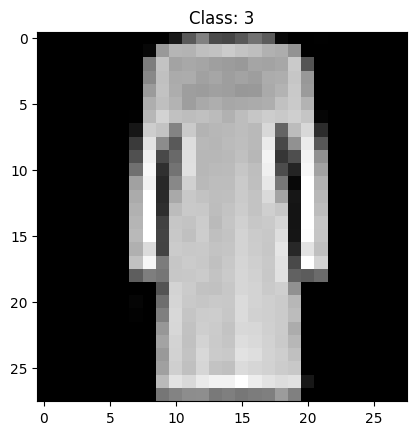

In [9]:
# Display a single resized image from the shuffled training set
plt.imshow(X_train[80], cmap='gray')
plt.title(f"Class: {y_train[80]}")
plt.show()

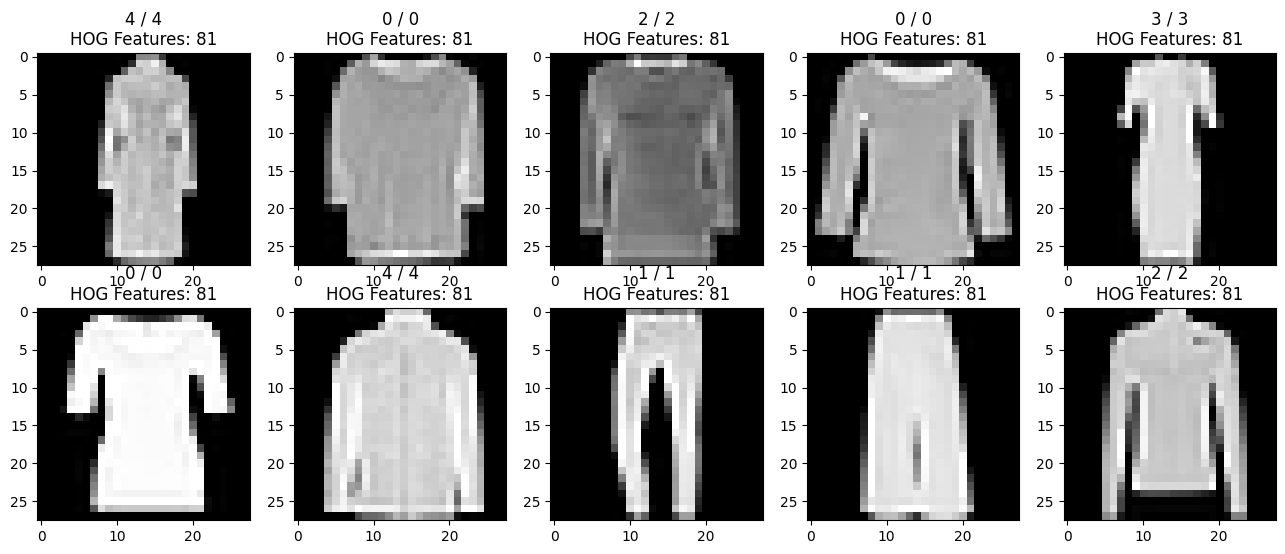

In [10]:
# HOG Feature Extraction Function
def extract_hog_features(image):
    # Compute HOG features and get the HOG image
    features, hog_image = hog(image, visualize=True)

    # # Rescale intensity of the HOG image for better visualization
    # hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features

# Extract HOG features for resized and shuffled images in the training set
hog_features_train = [extract_hog_features(image) for image in X_train]
hog_features_test= [extract_hog_features(image) for image in X_test]

# Display a grid of resized and shuffled images along with their HOG features
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 10):
    plt.subplot(5, 5, j)
    j += 1

    # Display the resized and shuffled image
    plt.imshow(X_train[i], cmap='gray')

    # Display class label, actual label, and the number of HOG features
    plt.title('{} / {}\nHOG Features: {}'.format(class_labels[y_train[i]], y_train[i],len(hog_features_train[i])))


# Show all images at once
plt.show()


In [12]:
X_image_train=np.array(hog_features_train)
X_image_test=np.array(hog_features_test)

In [15]:
import warnings
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
# Ignore all warnings
warnings.filterwarnings("ignore")
lo=LogisticRegression()
lo.fit(X_image_train,y_train)
y_predict=lo.predict(X_image_test)
print("accuracy : ",accuracy_score(y_test,y_predict))
# y_pred_proba = lo.predict_proba(X_image_test)[:, 1]
# # Compute ROC curve
# fpr, tpr, _ = roc_curve(label_image_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

accuracy :  0.8591666666666666


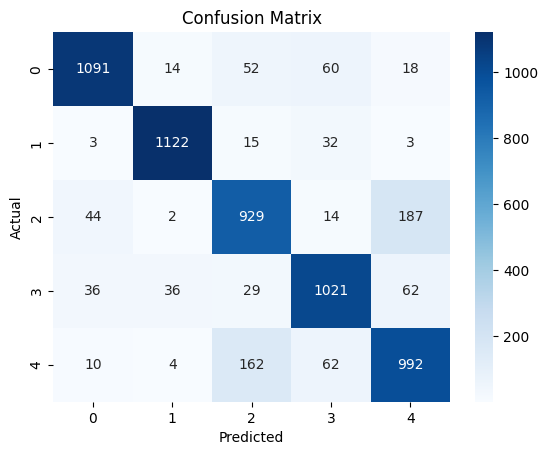

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

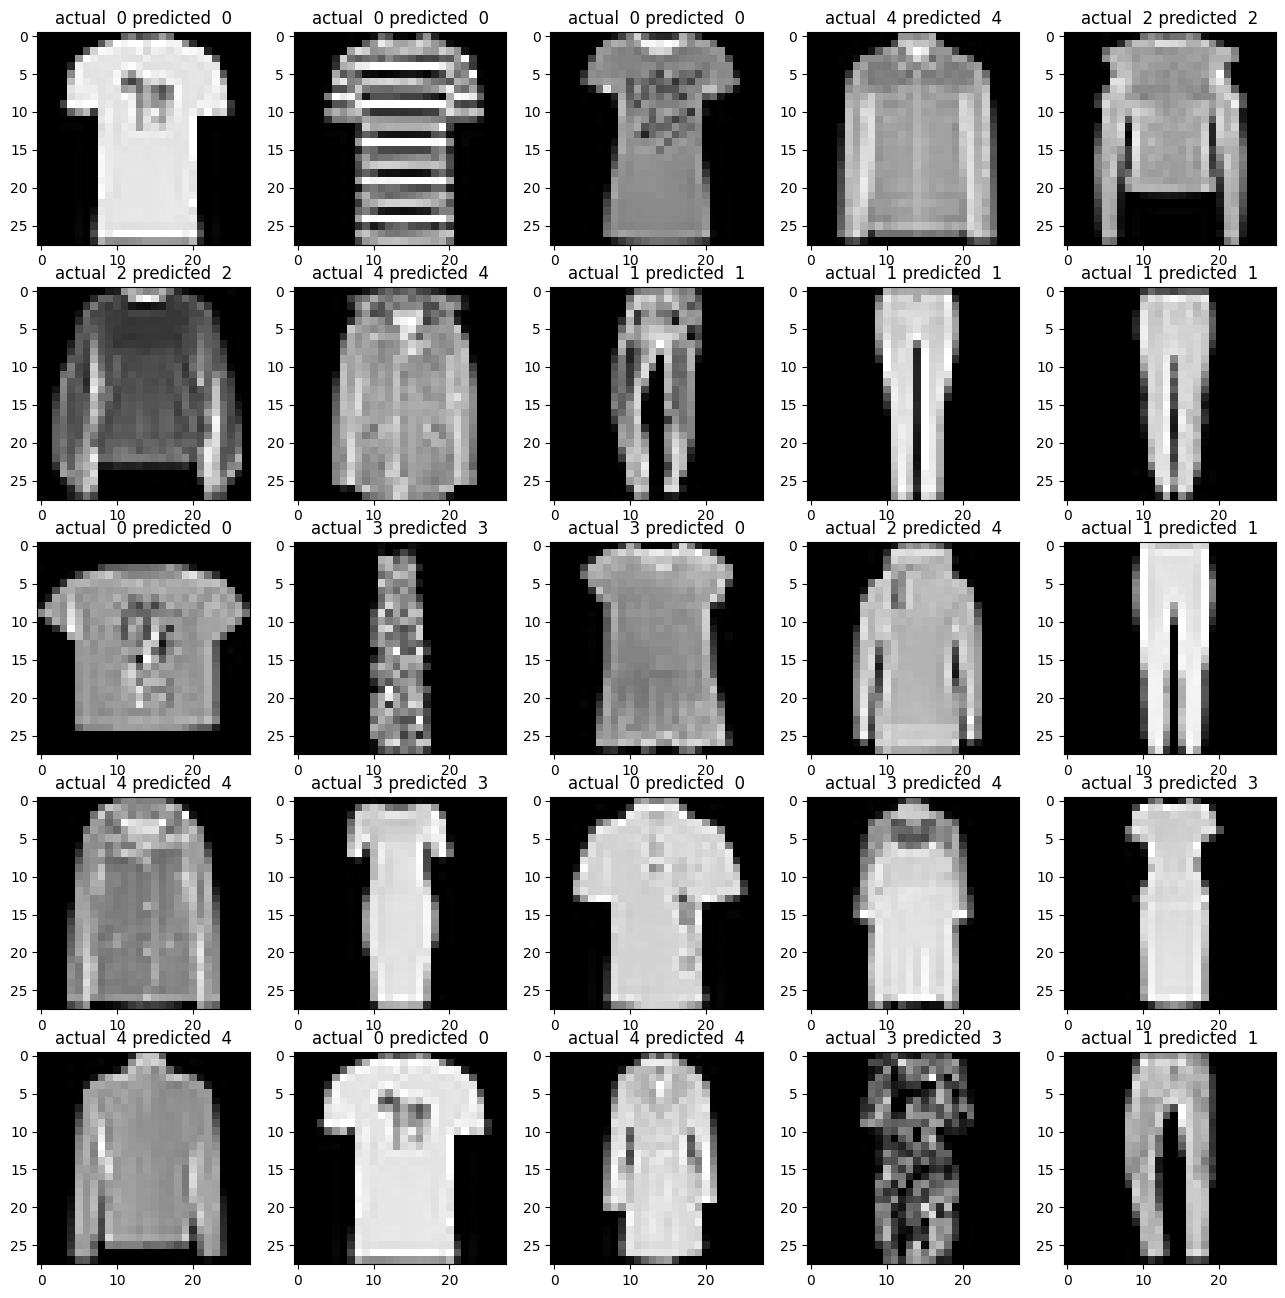

In [35]:
#because of hog (81,)
# Display a grid of resized and shuffled images along with their HOG features
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j)
    j += 1

    # Display the resized and shuffled image
    plt.imshow(X_test[i], cmap='gray')

    # Display class label, actual label, and the number of HOG features
    plt.title(f"actual  {y_test[i]} predicted  {y_predict[i]}")


# Show all images at once
plt.show()

In [36]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[1091,   14,   52,   60,   18],
       [   3, 1122,   15,   32,    3],
       [  44,    2,  929,   14,  187],
       [  36,   36,   29, 1021,   62],
       [  10,    4,  162,   62,  992]])

In [17]:
#k_mean
k=KMeans(n_clusters=5,random_state=42)
k.fit(X_image_train)
y_predict_mean=k.predict(X_image_test)

In [18]:
#confusion_matrix
confusion_matrix(y_test,y_predict_mean)

array([[  98,   73,    2,  821,  241],
       [  89,   29, 1044,    1,   12],
       [   9,  917,    0,   16,  234],
       [ 802,  116,  122,   19,  125],
       [  95,  920,    1,    5,  209]], dtype=int64)

In [39]:
X_image_train.shape

(24000, 81)

In [40]:
print("accuracy : ",accuracy_score(y_test,y_predict_mean))

accuracy :  0.528


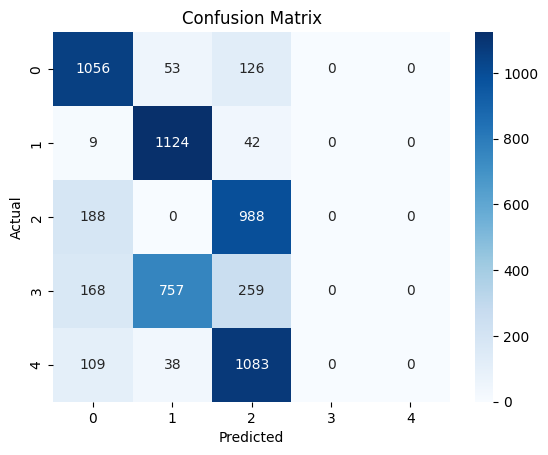

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predict_mean)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

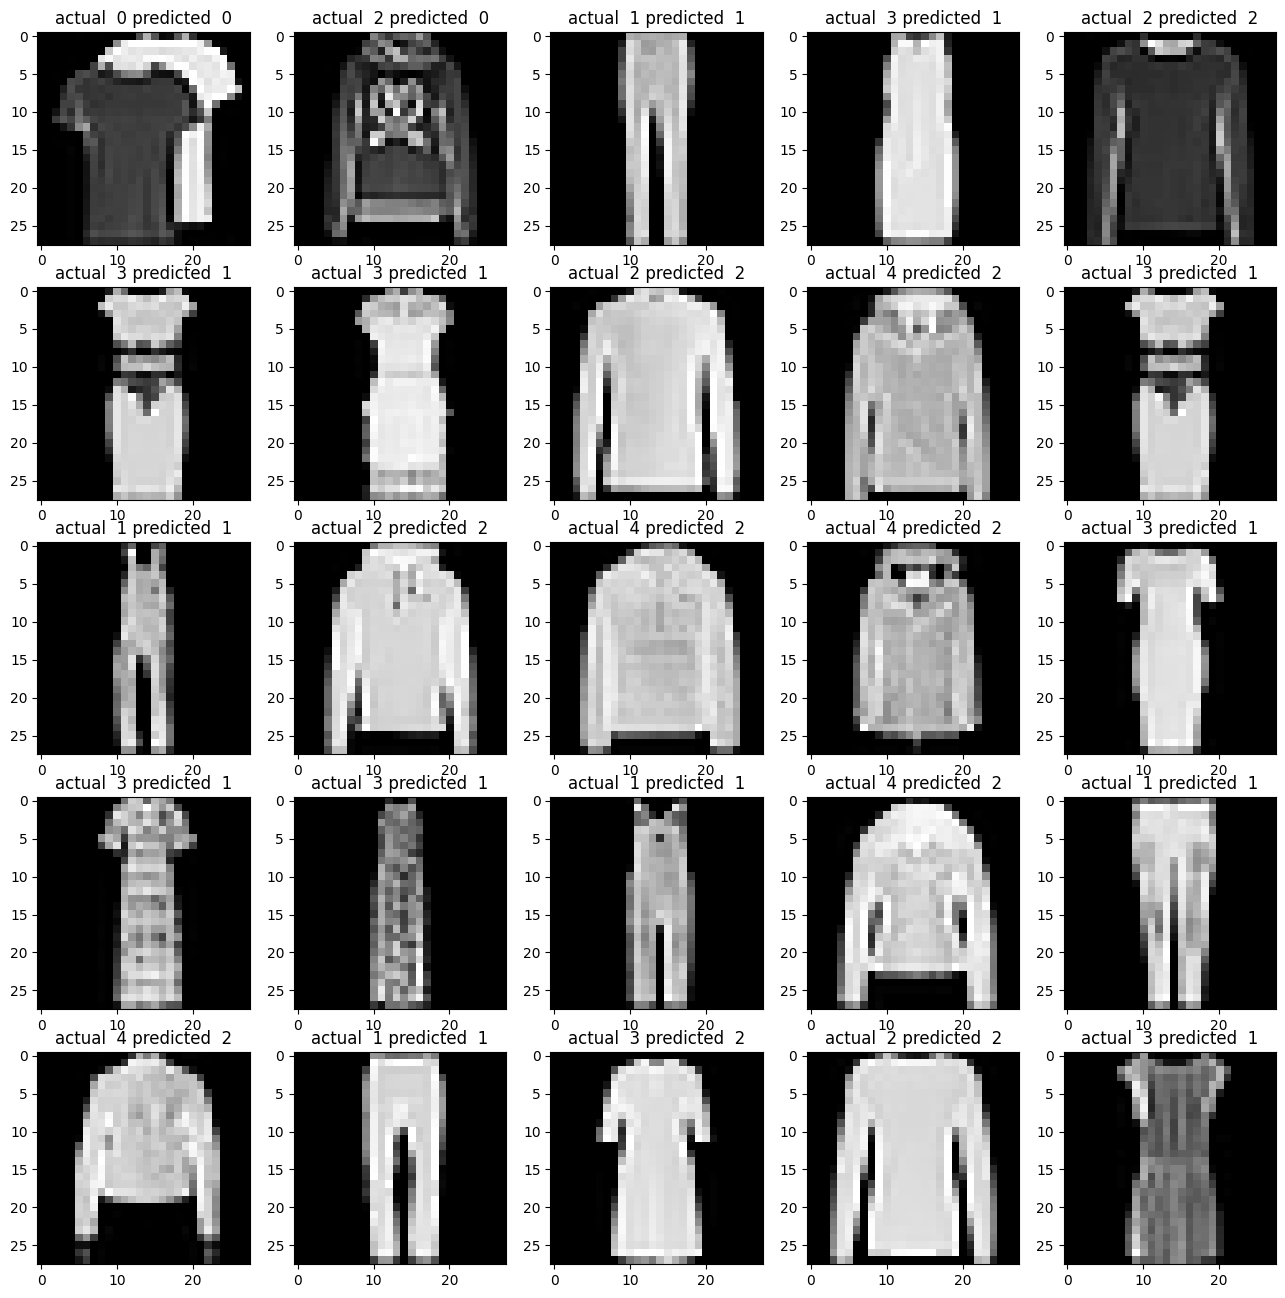

In [41]:
#because of hog (81,)
# Display a grid of resized and shuffled images along with their HOG features for KMean
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j)
    j += 1

    # Display the resized and shuffled image
    plt.imshow(X_test[i], cmap='gray')

    # Display class label, actual label, and the number of HOG features
    plt.title(f"actual  {y_test[i]} predicted  {y_predict_mean[i]}")


# Show all images at once
plt.show()